# Barebones example

In [1]:
in_path = '/tmp/imagenet'
in_info_path = '/tmp/imagenet_info'

### Recover ImageNet hierarchy

In [2]:
from robustness.tools.imagenet_helpers import ImageNetHierarchy

in_hier = ImageNetHierarchy(in_path,
                            in_info_path)

### Probe ImageNet hierarchy

In [3]:
for cnt, (wnid, ndesc_in, ndesc_total) in enumerate(in_hier.wnid_sorted):
    if cnt < 10:
        print(f"WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}, #ImageNet descendants: {ndesc_in}")

WordNet ID: n00001740, Name: entity, #ImageNet descendants: 1000
WordNet ID: n00001930, Name: physical entity, #ImageNet descendants: 992
WordNet ID: n00002684, Name: object, physical object, #ImageNet descendants: 946
WordNet ID: n00003553, Name: whole, unit, #ImageNet descendants: 936
WordNet ID: n00021939, Name: artifact, artefact, #ImageNet descendants: 521
WordNet ID: n00004258, Name: living thing, animate thing, #ImageNet descendants: 407
WordNet ID: n00004475, Name: organism, being, #ImageNet descendants: 407
WordNet ID: n00015388, Name: animal, animate being, beast, brute, creature, fauna, #ImageNet descendants: 398
WordNet ID: n03575240, Name: instrumentality, instrumentation, #ImageNet descendants: 348
WordNet ID: n01466257, Name: chordate, #ImageNet descendants: 207


In [4]:
ancestor_wnid = 'n02120997'
print(f"Superclass | WordNet ID: {ancestor_wnid}, Name: {in_hier.wnid_to_name[ancestor_wnid]}")
for cnt, wnid in enumerate(in_hier.tree[ancestor_wnid].descendants_all):
    if wnid in in_hier.in_wnids:
        print(f"ImageNet subclass | WordNet ID: {wnid}, Name: {in_hier.wnid_to_name[wnid]}")

Superclass | WordNet ID: n02120997, Name: feline, felid
ImageNet subclass | WordNet ID: n02128925, Name: jaguar, panther, Panthera onca, Felis onca
ImageNet subclass | WordNet ID: n02129165, Name: lion, king of beasts, Panthera leo
ImageNet subclass | WordNet ID: n02130308, Name: cheetah, chetah, Acinonyx jubatus
ImageNet subclass | WordNet ID: n02129604, Name: tiger, Panthera tigris
ImageNet subclass | WordNet ID: n02127052, Name: lynx, catamount
ImageNet subclass | WordNet ID: n02128385, Name: leopard, Panthera pardus
ImageNet subclass | WordNet ID: n02128757, Name: snow leopard, ounce, Panthera uncia
ImageNet subclass | WordNet ID: n02125311, Name: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor


### Find desired number of superclasses

In [5]:
n_classes = 8

superclass_wnid, class_ranges, label_map = in_hier.get_superclasses(n_classes,
                                           ancestor_wnid='n00001740',
                                           superclass_lowest=['n02084071'],
                                           balanced=True)

### (Or instead) Directly specify superclasses

In [6]:
from robustness.tools.imagenet_helpers import common_superclass_wnid

superclass_wnid = common_superclass_wnid('mixed_10')
class_ranges, label_map = in_hier.get_subclasses(superclass_wnid,
                                                 balanced=True)

### Create dataset and loader

In [7]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet(in_path,
                                         class_ranges)

train_loader, test_loader = custom_dataset.make_loaders(workers=10,
                                                        batch_size=5)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
Train set size: 77237
Test set size: 3000


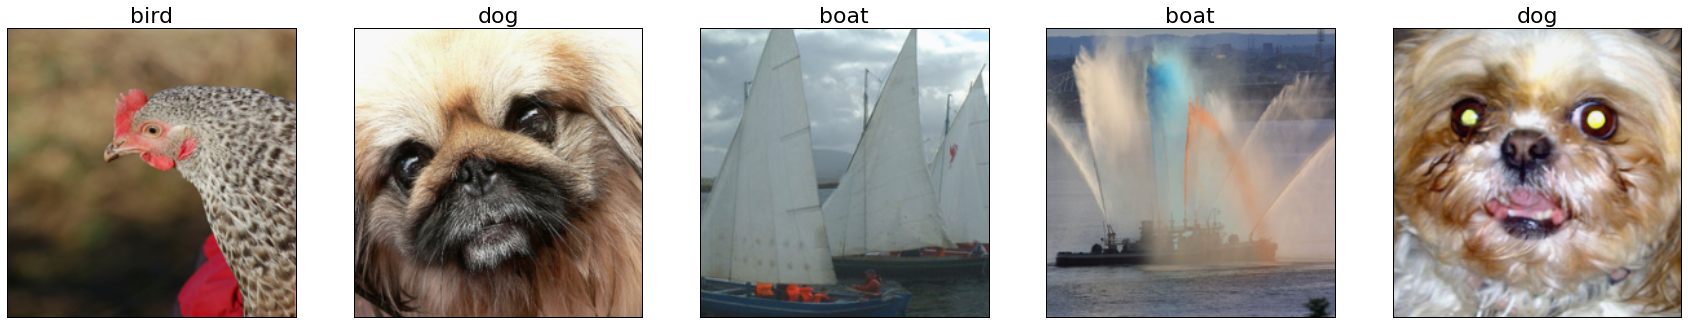

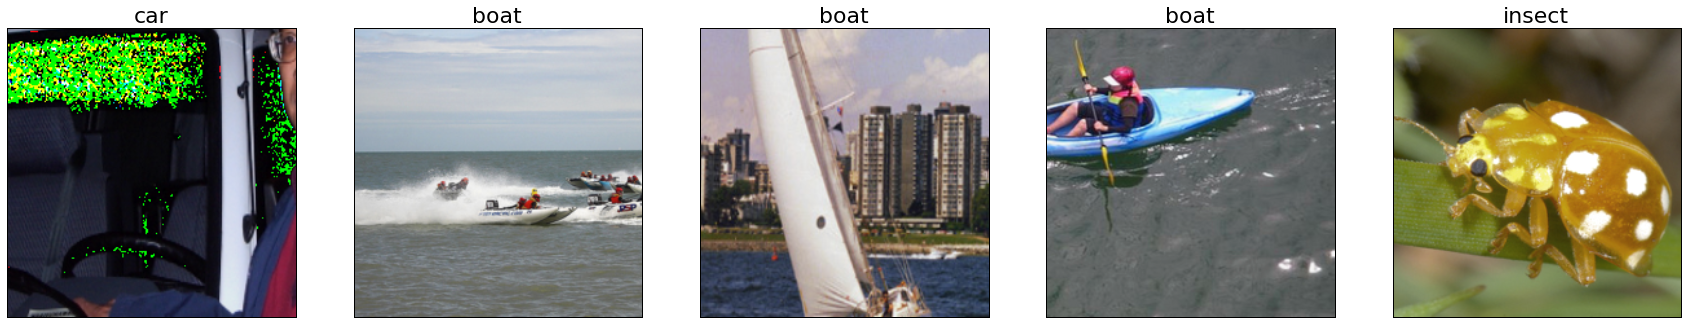

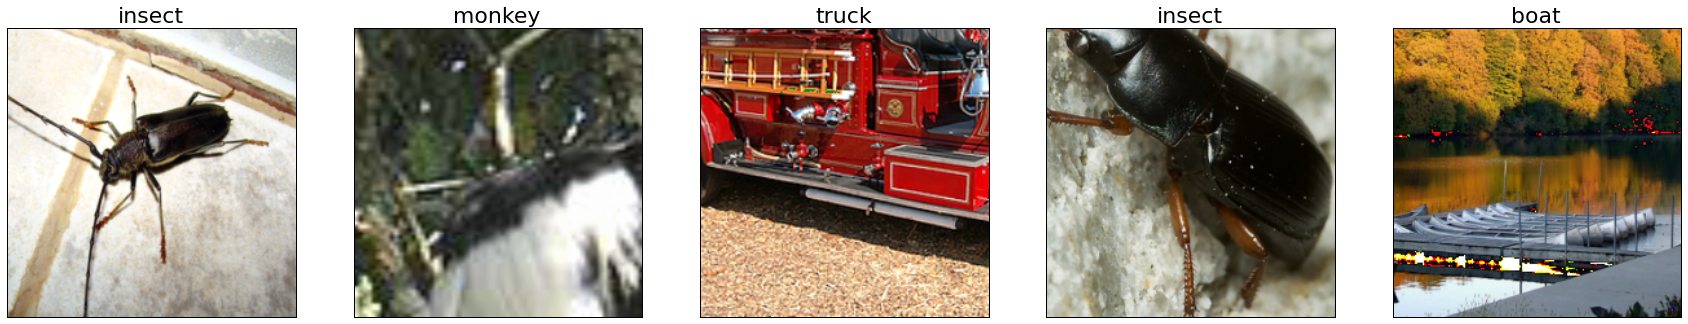

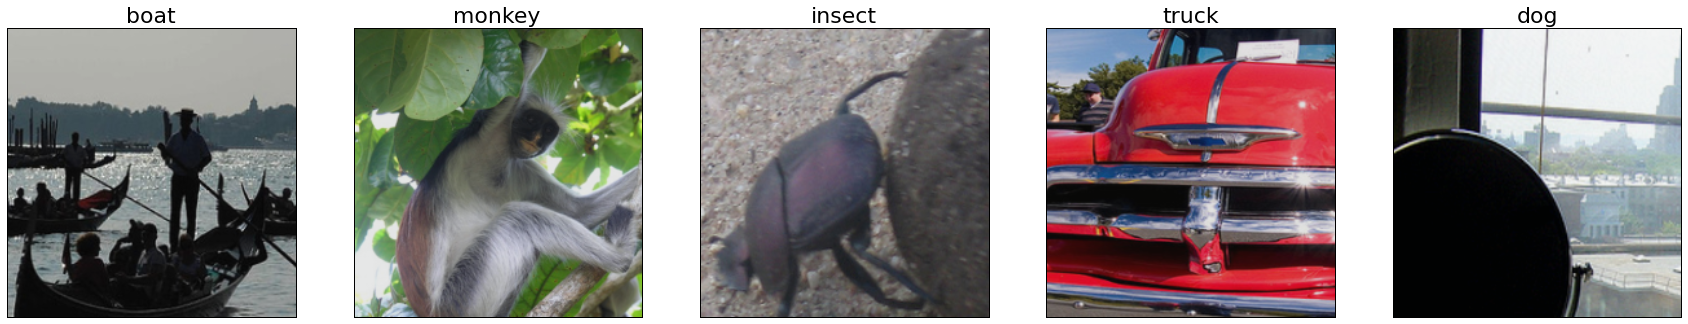

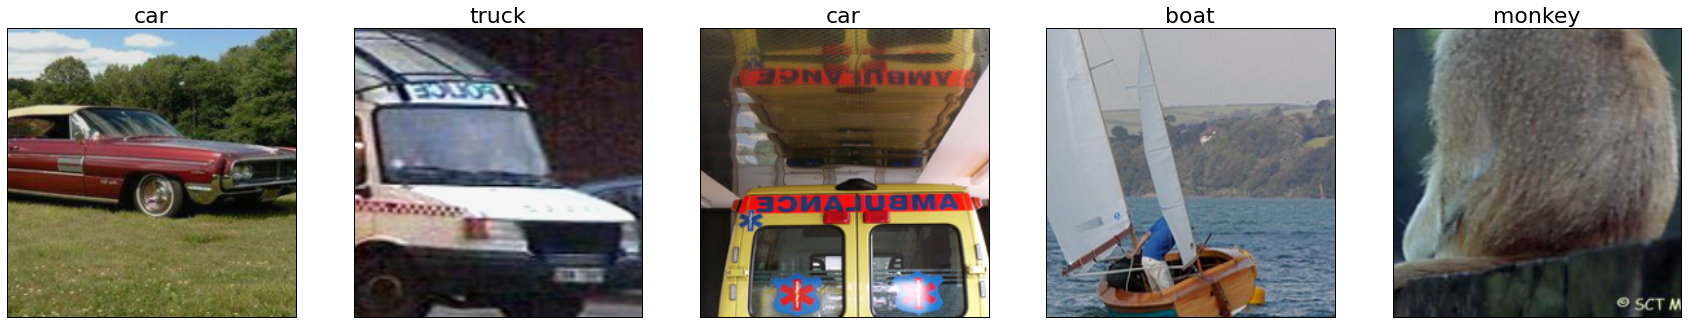

In [8]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    show_image_row([im],
                   tlist=[[label_map[int(k)].split(',')[0] for k in lab]],
                  size=(6, 6),
                  fontsize=22)